In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Numerical

In [14]:
df = pd.read_csv('data/train.csv',usecols=['Age','Fare','Survived'])

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
# check how many percentage data is missing
df.isnull().sum()/len(df) *100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [18]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.2)

In [19]:
X_train.head()

,Age,Fare
815,NaN,0.000
729,25.0,7.925
232,59.0,13.500
635,28.0,13.000
134,25.0,13.000


In [22]:
# lets impute the age values by random impution technique
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']
# for now we just give values age as it

In [39]:
# lets assigging random value at na
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

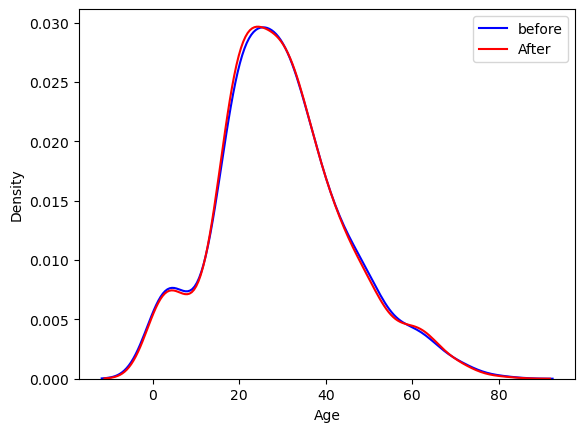

In [46]:
# let's check distribution is change or not
sns.kdeplot(X_train['Age'],color='blue',label='before')
sns.kdeplot(X_train['Age_imputed'],color='red',label='After')
plt.legend()

In [50]:
print("Before var : ",X_train['Age'].var())
print("After var : ",X_train['Age_imputed'].var())

Before var :  217.18931119569584
After var :  214.18824368510897


In [54]:
X_train[['Age','Fare','Age_imputed']].corr()

,Age,Fare,Age_imputed
Age,1.000000,0.099601,1.000000
Fare,0.099601,1.000000,0.092434
Age_imputed,1.000000,0.092434,1.000000


<Axes: >

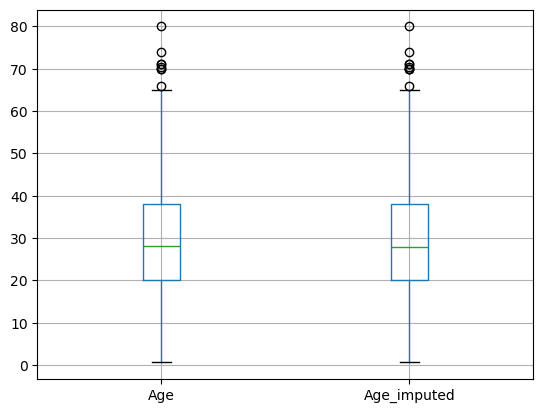

In [55]:
X_train[['Age','Age_imputed']].boxplot()

In [58]:
# this make sure that out put come for input has only on output
# Sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# Categorical

In [62]:
df = pd.read_csv('data/house-train.csv',usecols=['SalePrice','GarageQual','FireplaceQu'])

In [63]:
# check how many percentage data is missing
df.isnull().sum()/len(df) *100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [65]:
X = df
y = df['SalePrice']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [67]:
X_train.sample(3)

,FireplaceQu,GarageQual,SalePrice
1178,Gd,Fa,154900
821,NaN,TA,93000
783,TA,TA,165500


In [68]:
# let's create new col to impute values
X_train['FireplaceQu_impute'] = X_train['FireplaceQu']
X_test['FireplaceQu_impute'] = X_test['FireplaceQu']

X_train['GarageQual_impute'] = X_train['GarageQual']
X_test['GarageQual_impute'] = X_test['GarageQual']

In [77]:
# let's fill the na value
X_train['FireplaceQu_impute'][X_train['FireplaceQu_impute'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_impute'].isnull().sum()).values
X_test['FireplaceQu_impute'][X_test['FireplaceQu_impute'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_impute'].isnull().sum()).values

X_train['GarageQual_impute'][X_train['GarageQual_impute'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_impute'].isnull().sum()).values
X_test['GarageQual_impute'][X_test['GarageQual_impute'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual_impute'].isnull().sum()).values

In [79]:
# let's check ratio
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_impute'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.949137,0.952055
Fa,0.038147,0.035959
Gd,0.007266,0.006849
Po,0.002725,0.002568
Ex,0.002725,0.002568


In [81]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_impute'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.487805,0.387671
TA,0.409756,0.328767
Fa,0.048780,0.040411
Ex,0.032520,0.025342
Po,0.021138,0.017808


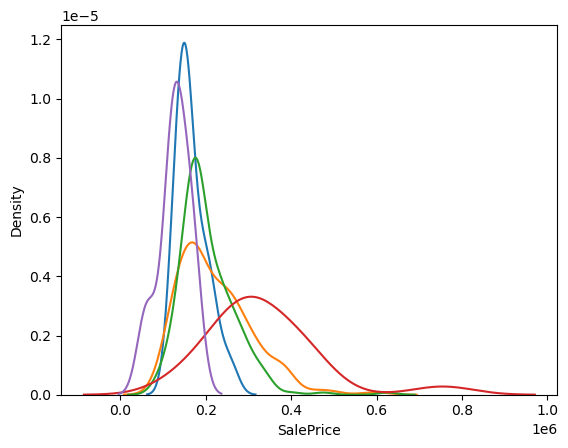

In [82]:
# let's see distribution
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

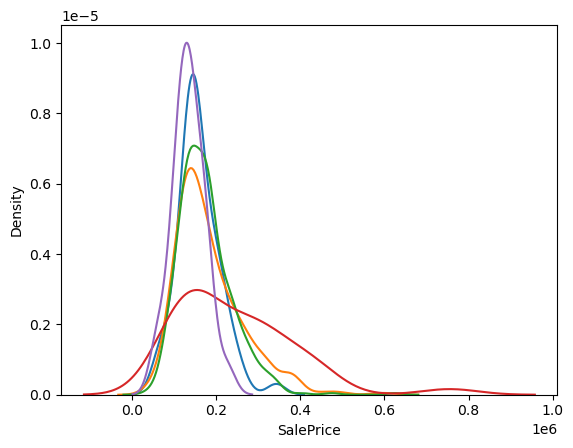

In [85]:
for category in X_train['FireplaceQu_impute'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_impute'] == category]['SalePrice'],hist=False,label=category)
plt.show()